### ALIF:

In [13]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

#ALIF
#                          _______
#     /|   |          |   |
#    / |   |          |   |
#   /  |   |          |   |_______
#  /___|   |          |   |
# /    |   |          |   |
#/     |   |________  |   |
#






























def current_interval(time, i=5, duration=(20, 80)):
    start, end = duration
    if start < time < end:
        return i
    return 0


def current_linear(time, c=2):
    return c * time


def sine_wave(time, c=10):
    return c * (0.9 + math.sin(time))


def current_constant(time, i=5):
    return i


def dt_current(time, i=5, d1=(20, 30), d2=(40, 70)):
    s1, e1 = d1
    s2, e2 = d2
    if s1 < time < e1 or s2 < time < e2:
        return i
    return 0


class ALIF:
    def __init__(self, t=100, dt=0.125, current_func=current_interval, u_rest=0, r=1, c=10, threshold=2,
                 a=2, b=2, w_const=5):
        self.time = t
        self.dt = dt
        self.i_function = current_func
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.a = a
        self.b = b
        self.w_constant = w_const
        self.u = []
        self.du()

    def spike_t(self, i):
        t = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        U = [self.u_rest for i in range(len(t))]
        W = [0 for _ in range(len(t))]
        current_inputs = [current_constant(j, i=i) for j in t]
        sigma_delta_function = 0
        spike_t = self.time
        current_spike_time = 0

        for j in range(len(t)):
            U[j] = U[j - 1] + ((self.r * current_inputs[j] - (U[j - 1] - self.u_rest) - self.r * W[j - 1])
                               / time_const) * self.dt
            if U[j] >= self.threshold:
                sigma_delta_function = 1
                U[j] = self.u_rest
                prev_spike_time = current_spike_time
                current_spike_time = t[j]
                spike_t = min(spike_t, current_spike_time - prev_spike_time)
            W[j] = W[j - 1] + (self.a * (U[j - 1] - self.u_rest)
                               - W[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0

        return spike_t

    def du(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        U = [self.u_rest for i in range(len(timer))]
        w = [0 for _ in range(len(timer))]
        i_input = [self.i_function(j) for j in timer]
        sigma_delta_function = 0

        for j in range(len(timer)):
            U[j] = U[j - 1] + ((self.r * i_input[j] - (U[j - 1] - self.u_rest) - self.r * w[j - 1])
                               / time_const) * self.dt
            if U[j] >= self.threshold:
                sigma_delta_function = 1
                U[j] = self.u_rest
            w[j] = w[j - 1] + (self.a * (U[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0

        self.u = U

    def plot(self, potentional_time=False, current_t=False, frequency_current=False):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Adaptive Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.i_function.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) +
                     "    a: " + str(self.a) +
                     "    b: " + str(self.b) +
                     "    tw: " + str(self.w_constant), fontsize=14, fontweight='bold')

        timer = np.arange(0, self.time + self.dt, self.dt)
        i_input = [self.i_function(j) for j in timer]

        if potentional_time:
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)

        if current_t:
            subplot(221)
            plot(timer, i_input)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)

        if frequency_current:
            time_const = self.r * self.c
            i_x = np.arange(0, max(i_input), self.dt)
            i_y = [0 for _ in range(len(i_x))]

            for j in range(len(i_x)):
                try:
                    i_y[j] = 1 / (self.spike_t(i=i_x[j]))
                except:
                    i_y[j] = 0
            subplot(221)
            plot(i_x, i_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)

























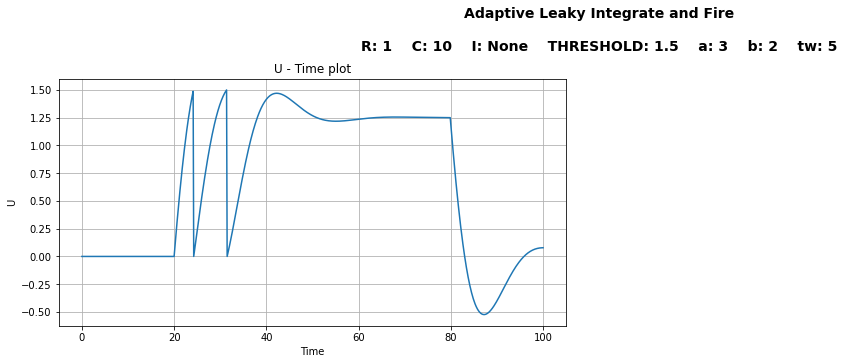

In [14]:
alif = ALIF(threshold=1.5, a=3)
alif.plot(potentional_time=True)

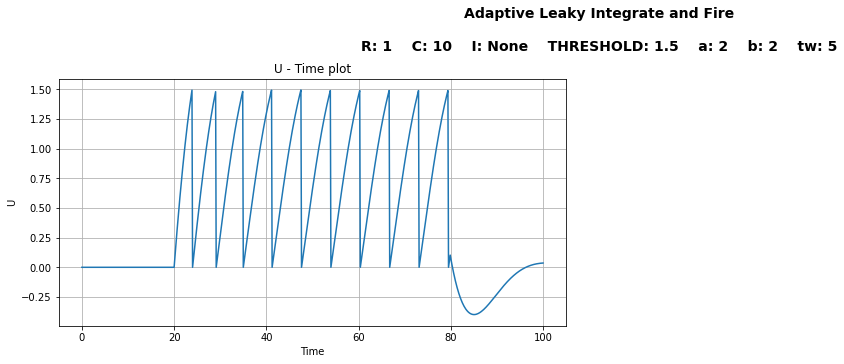

In [15]:
alif = ALIF(threshold=1.5, a=2)
alif.plot(potentional_time=True)

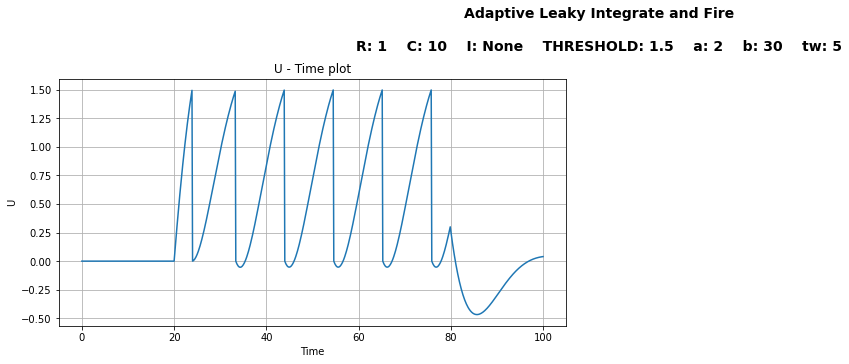

In [16]:
alif = ALIF(threshold=1.5, b=30)
alif.plot(potentional_time=True)

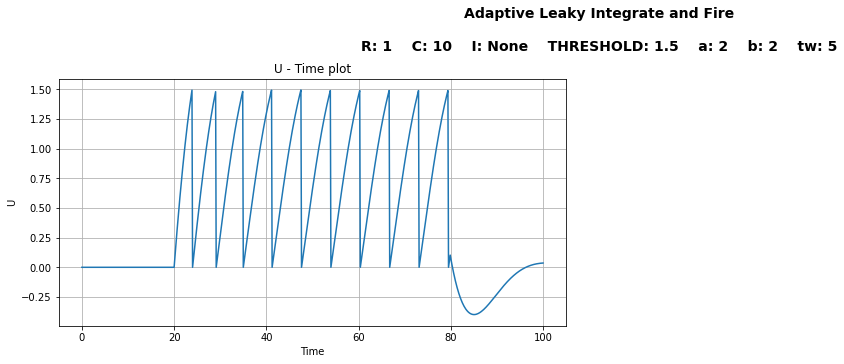

In [17]:
alif = ALIF(threshold=1.5, b=2)
alif.plot(potentional_time=True)

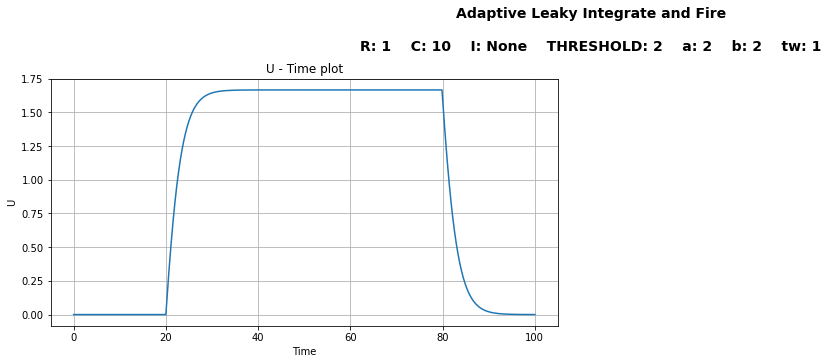

In [18]:
alif = ALIF(threshold=2, w_const=1)
alif.plot(potentional_time=True)

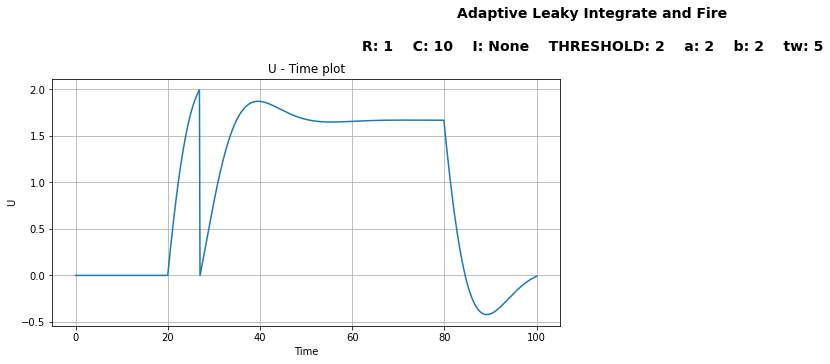

In [19]:
alif = ALIF(threshold=2, w_const=5)
alif.plot(potentional_time=True)

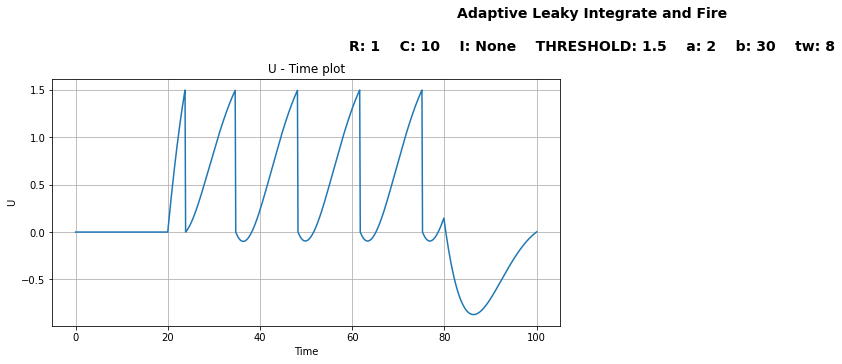

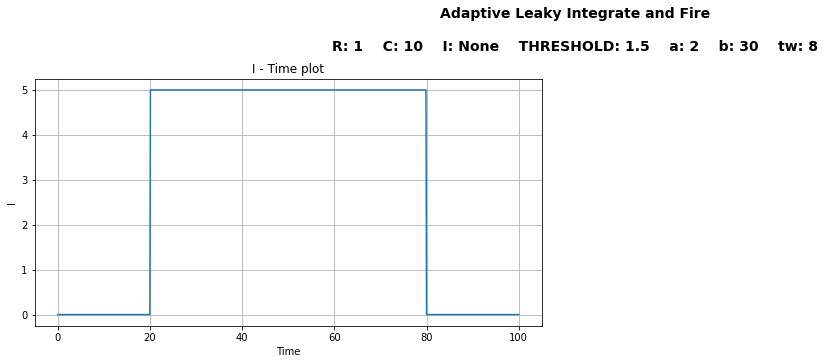

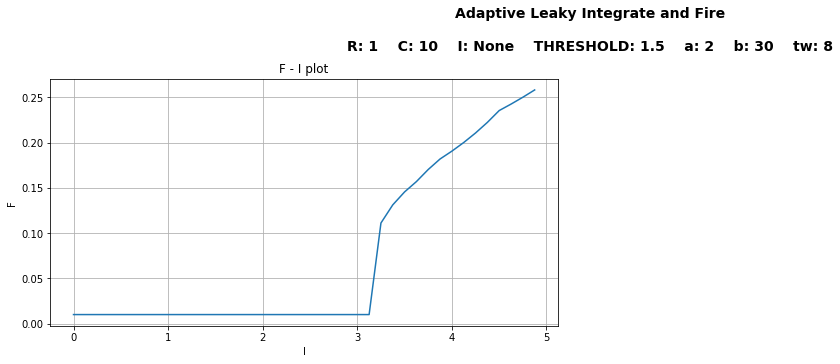

In [20]:
alif = ALIF(current_func=current_interval, threshold=1.5, b=30, w_const=8)
alif.plot(potentional_time=True)
alif.plot(current_t=True)
alif.plot(frequency_current=True)

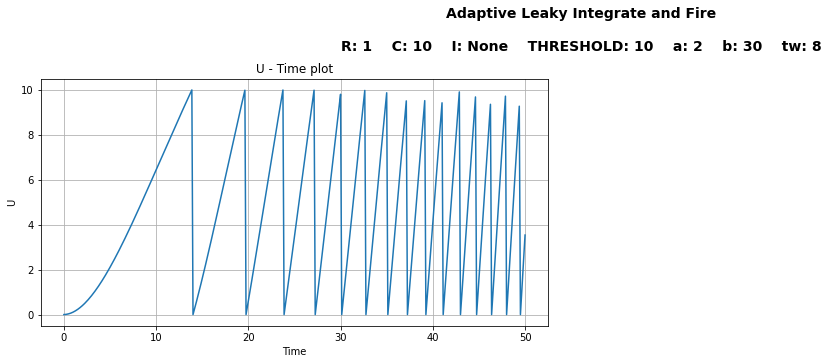

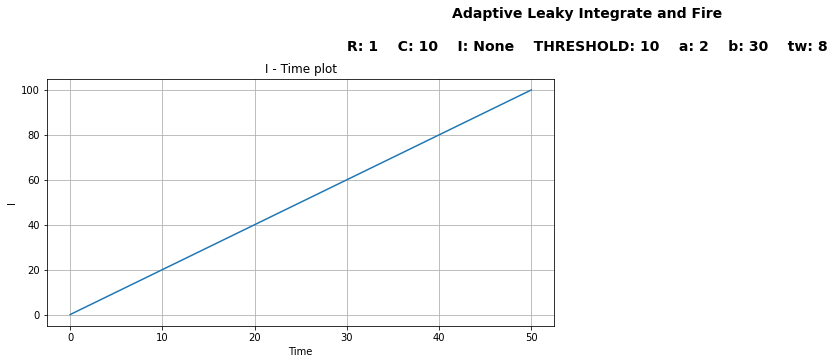

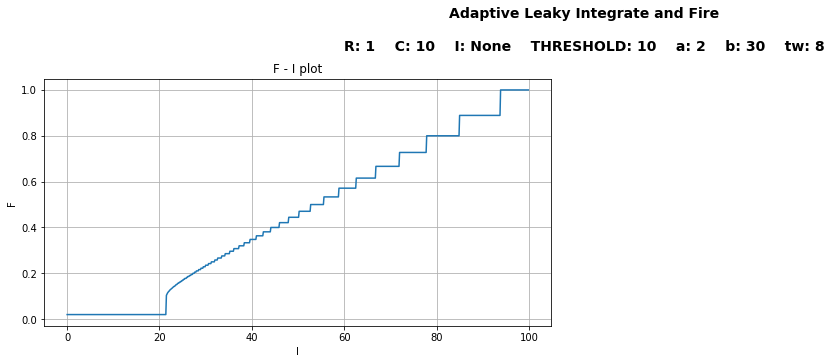

In [21]:
alif = ALIF(current_func=current_linear, t=50, threshold=10, b=30, w_const=8)
alif.plot(potentional_time=True)
alif.plot(current_t=True)
alif.plot(frequency_current=True)

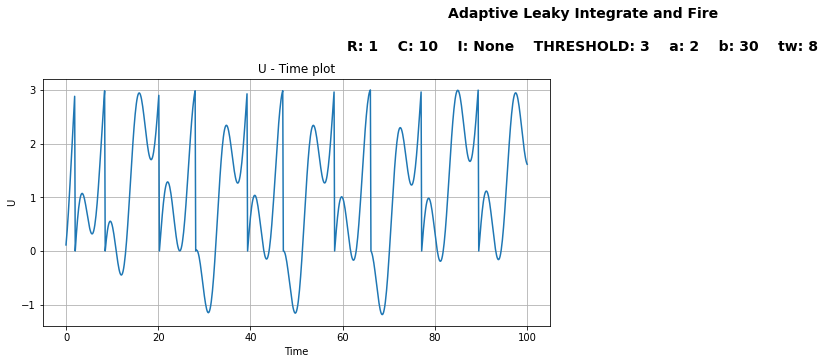

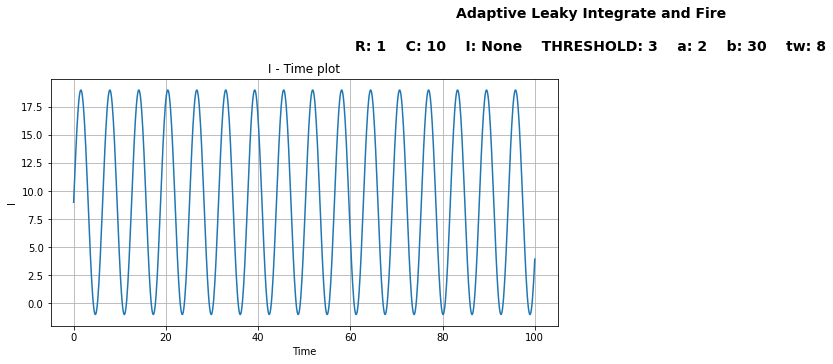

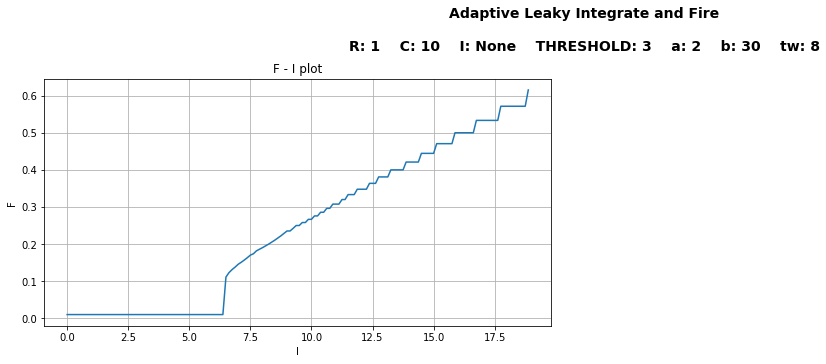

In [22]:
alif = ALIF(current_func=sine_wave, threshold=3, b=30, w_const=8)
alif.plot(potentional_time=True)
alif.plot(current_t=True)
alif.plot(frequency_current=True)

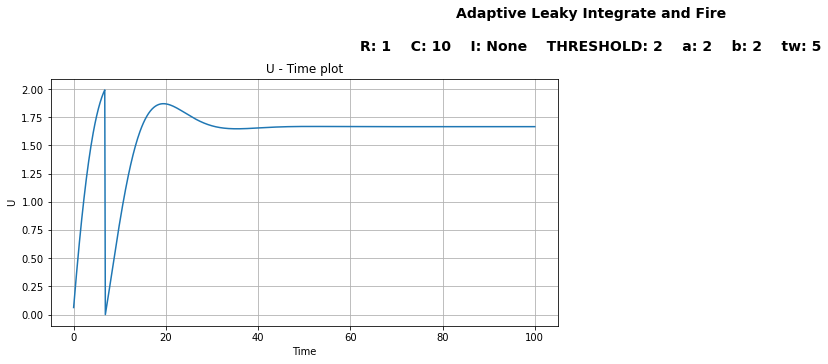

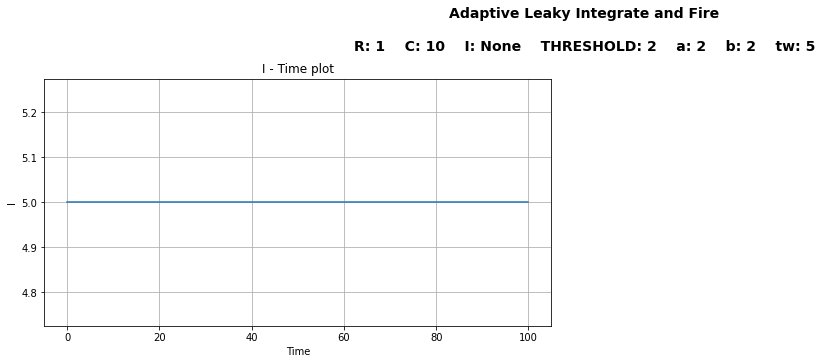

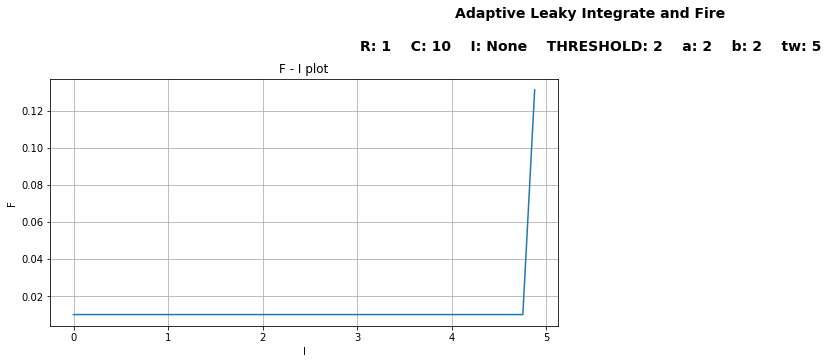

In [23]:
alif = ALIF(current_func=current_constant)
alif.plot(potentional_time=True)
alif.plot(current_t=True)
alif.plot(frequency_current=True)

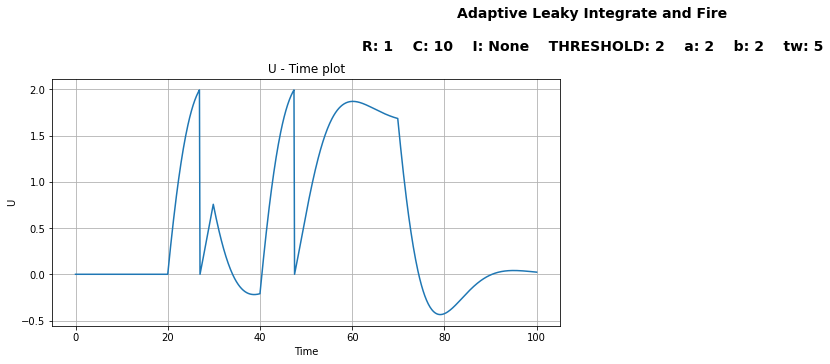

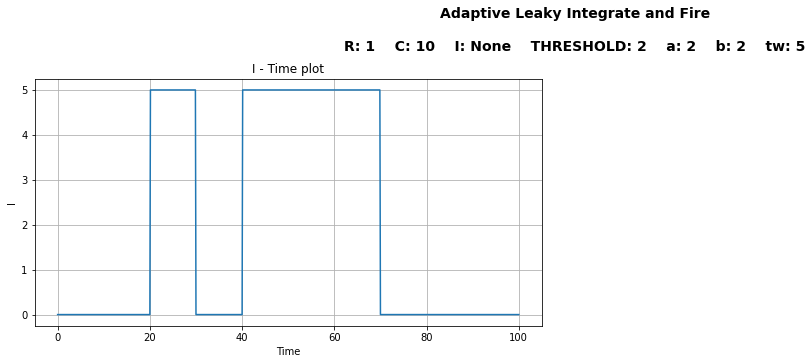

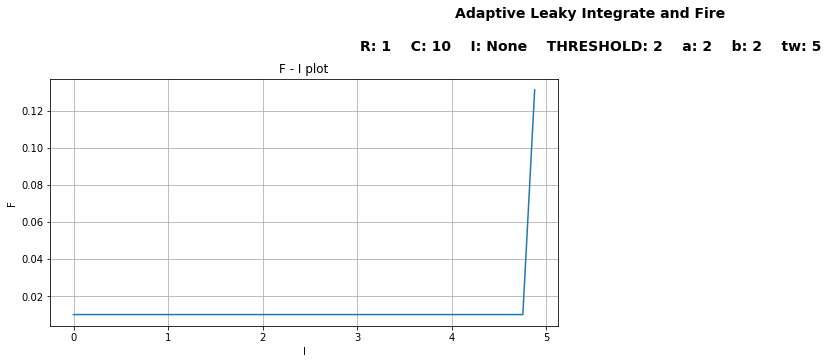

In [24]:
alif = ALIF(current_func=dt_current, threshold=2)
alif.plot(potentional_time=True)
alif.plot(current_t=True)
alif.plot(frequency_current=True)

### Hasan Roknabady 99222042